<a href="https://colab.research.google.com/github/amal2334/Big-Data-Analytics/blob/main/Big_data_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Table of content :
- **1.Introduction**
- **2.download necessary librairies**
- **3.Data Cleaning and Preprocessing**

  - Handlling  missing values

  - Detecting  and removing  duplicates

  - Correcting  data types (especially date)

  - Removing  or treating  invalid transactions (negative quantities or prices)
  - outliers Detection and Handling.

- **4.Exploratory Data Analysis (EDA)**
   - Descriptive Statistics: Generating summary statistics for numerical columns.
   - Distribution Analysis: Visualizing the distributions of key numerical variables.
   - Categorical Variable Analysis: Examining the unique values and frequencies of categorical columns.
   - Correlation Analysis: Exploring relationships between numerical variables.
- **5.Feature Engineering**
- **6. Business Questions Analysis**
   - Temporal Sales Analysis
   - Regional Sales Performance
   - Market Basket Analysis
   - Product Performance
   - Customer Analytics
- **7. Customer Segmentation Model**
   - Determined Optimal Clusters
   - Applying  K-Means Clustering
   - Analyzing  Cluster Characteristics
- **8. Product Recommendation Model.**
  - Created a User-Item Matrix
  - Calculating  Item Similarity
  - Generating  Recommendations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
data=pd.read_csv("Online Retail.csv")

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
data.shape

(541909, 8)

In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000



 - The Quantity and UnitPrice columns show negative minimum
 values, indicating returns or erroneous entries. These will require careful handling during data cleaning.

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# **Note:**


- StockCode : Object (string).
- Description : Object (string). This column has missing values.
- Quantity : Integer. This column contains negative values, which typically
 represent returned items.
- InvoiceDate : Object (string). This needs to be converted to a datetime
 object for temporal analysis.
- UnitPrice : Float. This column also contains negative values, likely for
 returned items or data entry errors.
- CustomerID : Float. This column has a significant number of missing values.
- Country : Object (string)

# **Data Cleaning and Preprocessing**

**handelling missing values**

In [ ]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


# **Note:**
- Since 0.27% of missing values that exist in the description column, we will dop those rows
- we have 135080 of missing values in the customer ID so ,it will be risky to delete those rows as it will delete 1/4 th of data .
- For this reson we are going to fill it with a placeholder "-1" or "guests" .

In [ ]:
data=data.dropna(subset=["Description"])

In [ ]:
data["CustomerID"].fillna("-1",inplace=True)

<ipython-input-15-317934995>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["CustomerID"].fillna("-1",inplace=True)
<ipython-input-15-317934995>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data["CustomerID"].fillna("-1",inplace=True)
<ipython-input-15-317934995>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [ ]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


# **Handelling duplicates values**

In [ ]:
data.duplicated().sum()

np.int64(5268)

Note:
- we have 5268 duplicated rows out of 541909 total rows , which is approximately 0.97% duplictaes
- we have to make sure if the duplicates are accidental duplicate entries or ligitimate multiple orders.

In [ ]:
#find all duplicates rows
duplicated_rows=data[data.duplicated(keep=False)]

#display top rows of duplicates for review
duplicated_rows.sort_values(by=["InvoiceNo","StockCode"]).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
565,536412,21448,12 DAISY PEGS IN WOOD BOX,2,12/1/2010 11:49,1.65,17920.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom


In [ ]:
data.drop_duplicates(inplace=True)

<ipython-input-19-2282015914>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [ ]:
data.duplicated().sum()

np.int64(0)

# **Treating Anomalies(negative quantities and prices)**
- Quantity and UnitPrice columns contain negative values, which are likely for returned items or data entry errors.

In [ ]:
data = data[data['Quantity'] > 0]
data = data[data['UnitPrice'] > 0]

In [ ]:
data.describe()

,Quantity,UnitPrice
count,524878.000000,524878.000000
mean,10.616600,3.922573
std,156.280031,36.093028
min,1.000000,0.001000
25%,1.000000,1.250000
50%,4.000000,2.080000
75%,11.000000,4.130000
max,80995.000000,13541.330000


# **Correcting  data types**

In [ ]:
 data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   524878 non-null  object        
 7   Country      524878 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.0+ MB


In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.tail()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
data.shape


(524878, 8)

In [ ]:
data.to_csv("OnlineRetail_cleaned.csv", index=False)
print("\nCleaned data saved to OnlineRetail_cleaned.csv")


Cleaned data saved to OnlineRetail_cleaned.csv


**Outlier detection and handelling**
- Outliers are extreme values that deviate significantly from other observations. In our dataset, Quantity and UnitPrice are prone to outliers due to large orders or unusually expensive items. While these might be legitimate transactions, they can skew statistical analyses and impact machine learning models. We will visualize these outliers using box plots and then cap them to a reasonable percentile to mitigate their effect.

<ipython-input-29-3269644276>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("OnlineRetail_cleaned.csv")


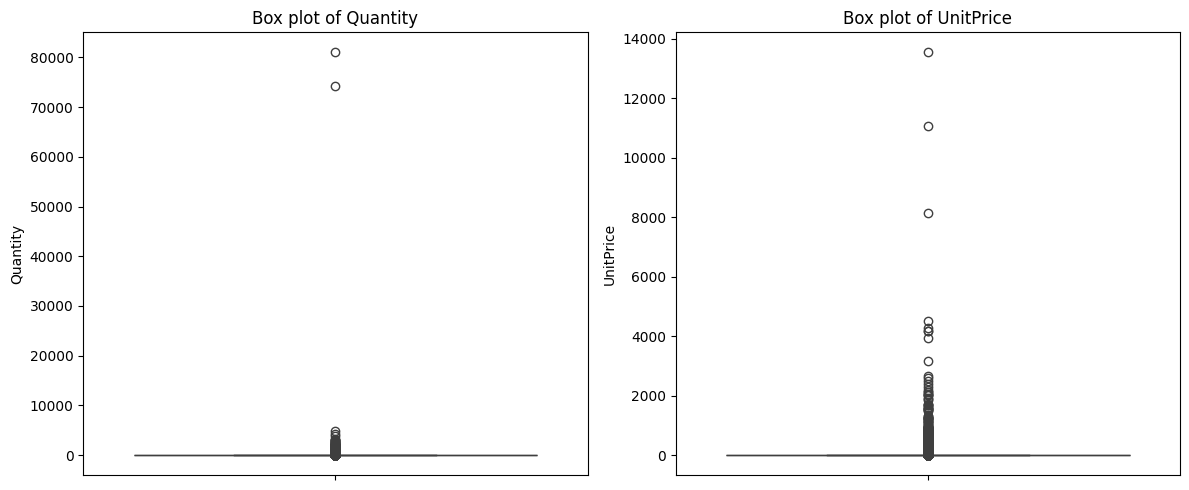

In [ ]:
data = pd.read_csv("OnlineRetail_cleaned.csv")
 # Visualize outliers using box plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.boxplot(y=data["Quantity"])
plt.title("Box plot of Quantity")
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.boxplot(y=data["UnitPrice"])
plt.title("Box plot of UnitPrice")
plt.tight_layout()

In [ ]:
Q_99 = data["Quantity"].quantile(0.99)
UP_99 = data["UnitPrice"].quantile(0.99)
data["Quantity"] = data["Quantity"].clip(upper=Q_99)
data["UnitPrice"] = data["UnitPrice"].clip(upper=UP_99)

- Box plots were used to visually identify outliers in Quantity and
UnitPrice, As observed  both columns exhibited numerous data points far beyond the whiskers, indicating extreme values.
- Instead of removing these outliers (which could lead to loss of valuable
 information), we chose to cap them
- This means any value exceeding the 99th percentile for Quantity and UnitPrice was replaced with the value at the 99th percentile.
- This method reduces the influence of extreme values while retaining the
 data points, making the distributions more manageable for analysis and modeling.
- The descriptive statistics after capping show a reduced maximum value for both Quantity and UnitPrice, confirming the capping operation

In [ ]:
data.to_csv("OnlineRetail_cleaned.csv", index=False)
print("Outliers capped and data saved to OnlineRetail_cleaned.csv")

Outliers capped and data saved to OnlineRetail_cleaned.csv


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,524878.000000,524878.000000,524878.000000
mean,8.839208,3.238820,11437.480323
std,15.321080,3.232394,6799.937261
min,1.000000,0.001000,-1.000000
25%,1.000000,1.250000,-1.000000
50%,4.000000,2.080000,14350.000000
75%,11.000000,4.130000,16245.000000
max,100.000000,16.980000,18287.000000


# **Exploratory Data Analysis (EDA)**


- Exploratory Data Analysis (EDA) is a critical step to understand the underlying patterns,relationships, and distributions within the data.
- This phase helps us gain insights that will inform feature engineering and model building.

In [ ]:
df=pd.read_csv("OnlineRetail_cleaned.csv")
df

<ipython-input-33-3562421472>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("OnlineRetail_cleaned.csv")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
#convert InvoiceDate into date datatype
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,524878.000000,524878,524878.000000,524878.000000
mean,8.839208,2011-07-04 15:30:16.317049088,3.238820,11437.480323
min,1.000000,2010-12-01 08:26:00,0.001000,-1.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,-1.000000
50%,4.000000,2011-07-20 11:22:00,2.080000,14350.000000
75%,11.000000,2011-10-19 11:41:00,4.130000,16245.000000
max,100.000000,2011-12-09 12:50:00,16.980000,18287.000000
std,15.321080,NaN,3.232394,6799.937261


- After capping outliers, the descriptive statistics for Quantity and UnitPrice provide a more representative summary of their central tendency and spread. The maximum values are now significantly lower,reflecting the capping at the 99th percentile.

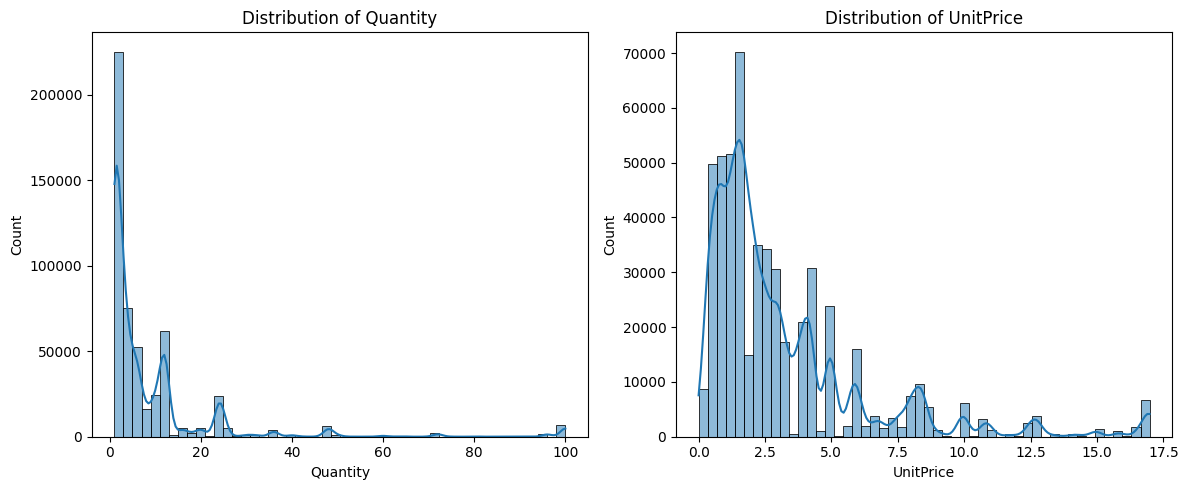

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["Quantity"], bins=50, kde=True)
plt.title("Distribution of Quantity")
plt.subplot(1, 2, 2)
sns.histplot(df["UnitPrice"], bins=50, kde=True)
plt.title("Distribution of UnitPrice")
plt.tight_layout()

- The histograms confirm that both Quantity and UnitPrice are heavily skewed
 towards lower values, even after capping. This indicates that most transactions
 involve a small number of items at lower prices, which is typical for retail sales.

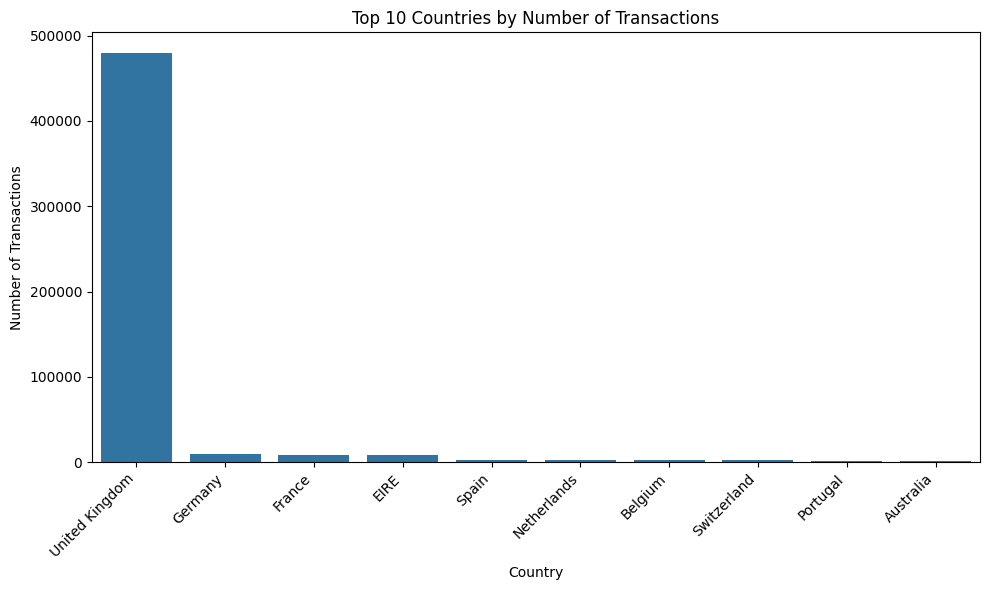

In [ ]:
country_counts = df["Country"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title("Top 10 Countries by Number of Transactions")
plt.xlabel("Country")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

- The bar chart clearly shows that the United Kingdom dominates the number of
 transactions by a significant margin. This suggests that the majority of the
 business's operations are concentrated within the UK.

In [ ]:
df["Description"].nunique()
print(" Top 10 Descriptions:\n")
print(df["Description"].value_counts().head(10))
print(" Unique StockCodes:", df["StockCode"].nunique())
print(" Top 10 StockCodes:\n")
print(df["StockCode"].value_counts().head(10))

 Top 10 Descriptions:

Description
WHITE HANGING HEART T-LIGHT HOLDER    2311
JUMBO BAG RED RETROSPOT               2109
REGENCY CAKESTAND 3 TIER              2007
PARTY BUNTING                         1699
LUNCH BAG RED RETROSPOT               1581
ASSORTED COLOUR BIRD ORNAMENT         1476
SET OF 3 CAKE TINS PANTRY DESIGN      1392
PACK OF 72 RETROSPOT CAKE CASES       1352
LUNCH BAG  BLACK SKULL.               1301
NATURAL SLATE HEART CHALKBOARD        1255
Name: count, dtype: int64
 Unique StockCodes: 3922
 Top 10 StockCodes:

StockCode
85123A    2253
85099B    2109
22423     2007
47566     1699
20725     1582
84879     1476
22197     1418
22720     1392
21212     1352
22383     1306
Name: count, dtype: int64


- We observed a large number of unique product descriptions and stock codes, indicating a diverse product catalog. The top 10 lists for both Description and StockCodehighlight the most frequently sold items, which can be useful for inventory management and marketing efforts.

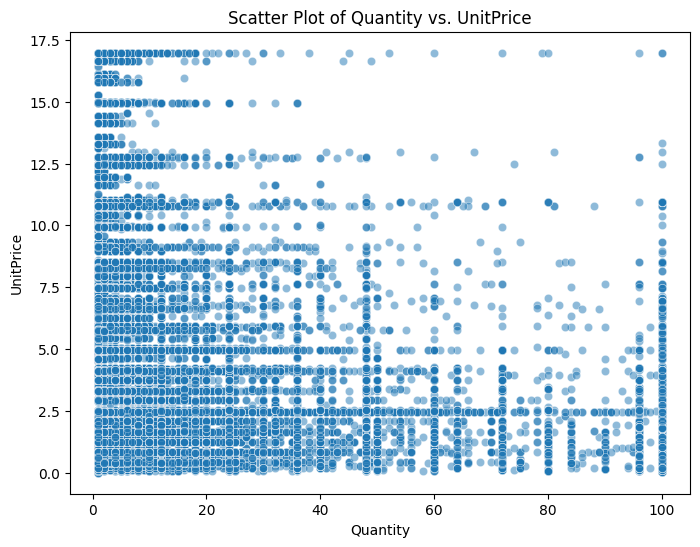

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Quantity", y="UnitPrice", data=df, alpha=0.5)
plt.title("Scatter Plot of Quantity vs. UnitPrice")
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")
plt.show()

- This scatter plot shows the relationship between the quantity of items sold and their unit price.
- Most data points are clustered in the lower-left corner, reinforcing
 that the majority of transactions involve lower quantities and unit prices. There are fewer transactions with high quantities or high unit prices.

# **5.Feature Engineering**
- Feature engineering is the process of creating new features from existing data to improve the performance of machine learning models and to gain deeper insights into the data.
- In this step, we will create TotalPrice, time-based features, and RFM (Recency,
 Frequency, Monetary) features.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524878 entries, 0 to 524877
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   524878 non-null  float64       
 7   Country      524878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.0+ MB


In [ ]:
# 1. Create TotalPrice feature
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

- TotalPrice: This new feature represents the total revenue generated by each
 individual item in a transaction, It's a direct and important metric for
 understanding sales value.

In [ ]:
# 2. Create time-based features
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Day"] = df["InvoiceDate"].dt.day
df["DayOfWeek"] = df["InvoiceDate"].dt.dayofweek # Monday=0, Sunday=6
df["Hour"] = df["InvoiceDate"].dt.hour

- Time-based Features: By extracting Year, Month, Day, DayOfWeek, and
Hour from InvoiceDate, we transform a single datetime column into multiple granular features.
-  These features are crucial for analyzing temporal sales trends,identifying peak shopping periods, and understanding customer behavior over
 time.

In [ ]:
latest_date = df["InvoiceDate"].max()
rfm = df.groupby("CustomerID").agg(Recency=("InvoiceDate",lambda date: (latest_date -
date.max()).days),Frequency=("InvoiceNo", "nunique"),Monetary=("TotalPrice", "sum")).reset_index()

- RFM Features: Recency, Frequency, and Monetary (RFM) are powerful metrics for
 customer segmentation.
- They summarize customer behavior in three key aspects:
   - Recency: How recently a customer made a purchase (lower values are better).
   - Frequency: How often a customer makes purchases (higher values are
 better).
   - Monetary: How much money a customer spends (higher values are better).
- These features are calculated at the CustomerID level, providing a consolidated view of each customer's value and engagement.
-The latest_date is used as a reference point to calculate recency accurately.

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,8


# **Note:**
- These new features enrich our dataset, making it more suitable for answering complex business questions and building effective machine learning models.

In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,-1.0,0,1429,1432405.93
1,12346.0,325,1,104.00
2,12347.0,1,7,4164.40
3,12348.0,74,4,1454.90
4,12349.0,18,1,1451.56


In [ ]:
df.to_csv("OnlineRetail_features.csv", index=False)
rfm.to_csv("RFM_data.csv", index=False)
print("Engineered features saved to OnlineRetail_features.csv and RFM_data.csv")

Engineered features saved to OnlineRetail_features.csv and RFM_data.csv


# **6. Business Questions Analysis**

 - In this section, we will use our cleaned and feature-engineered dataset answer the key business questions . We will perform specific analyses and create visualizations to provide clear and actionable insights

**6.1 Temporal Sales Analysis**
- We will analyze sales trends over different time periods to understand seasonality and customer purchasing patterns

**Monthly Sales Trend**

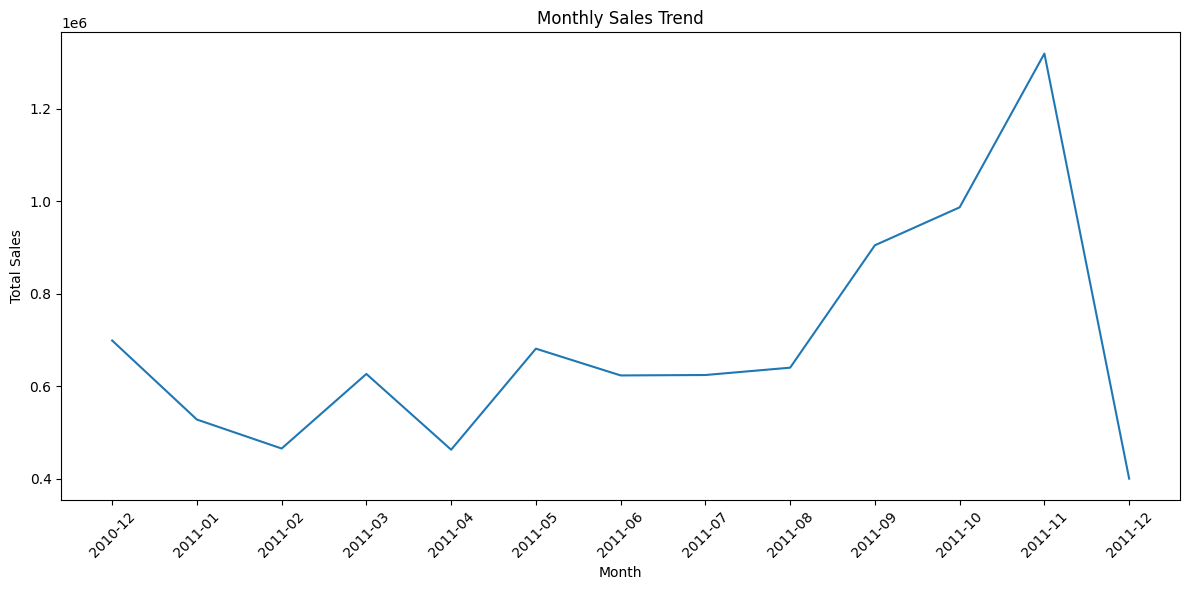

In [ ]:
sales_by_month =df.groupby(df["InvoiceDate"].dt.to_period("M"))["TotalPrice"].sum()
sales_by_month.index = sales_by_month.index.astype(str)
# Visualize monthly sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_by_month.index, y=sales_by_month.values)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()

- The monthly sales trend shows a clear upward trajectory throughout the year, with a significant peak in November and December. This indicates a strong holidayseason effect on sales.

**Sales by Day of Week**

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,8


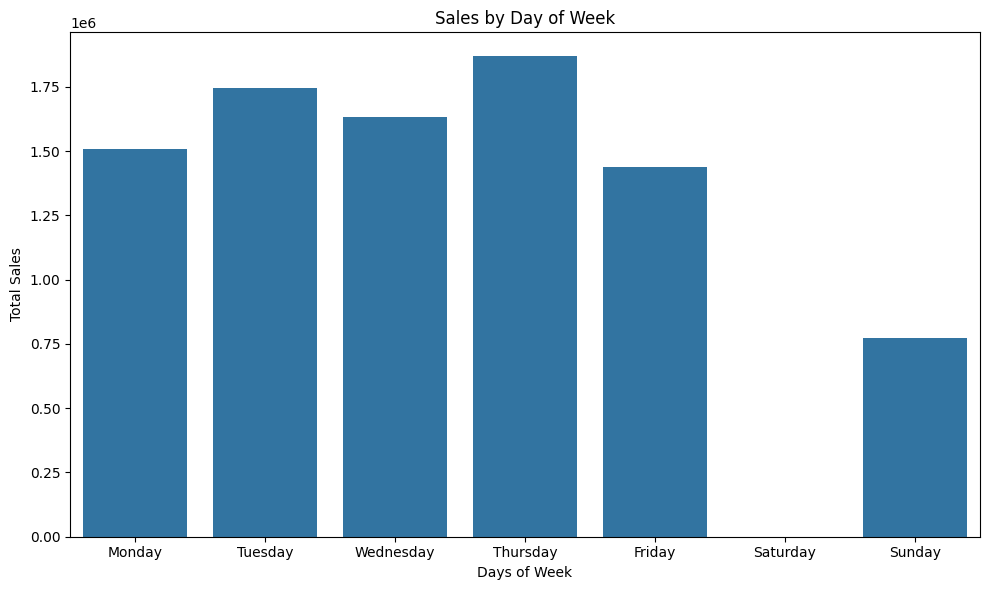

In [ ]:
sales_by_dayofweek = df.groupby("DayOfWeek")["TotalPrice"].sum().reindex(range(7), fill_value=0)
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
 # Visualize sales by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=days, y=sales_by_dayofweek.values)
plt.title("Sales by Day of Week")
plt.xlabel("Days of Week")
plt.ylabel("Total Sales")
plt.tight_layout()

- Sales are highest on Thursdays, followed by Wednesdays and Tuesdays.
- Weekends show significantly lower sales, with Saturday having almost no sales,
 suggesting that the business primarily operates on weekdays.

**Sales by Hour of Day**

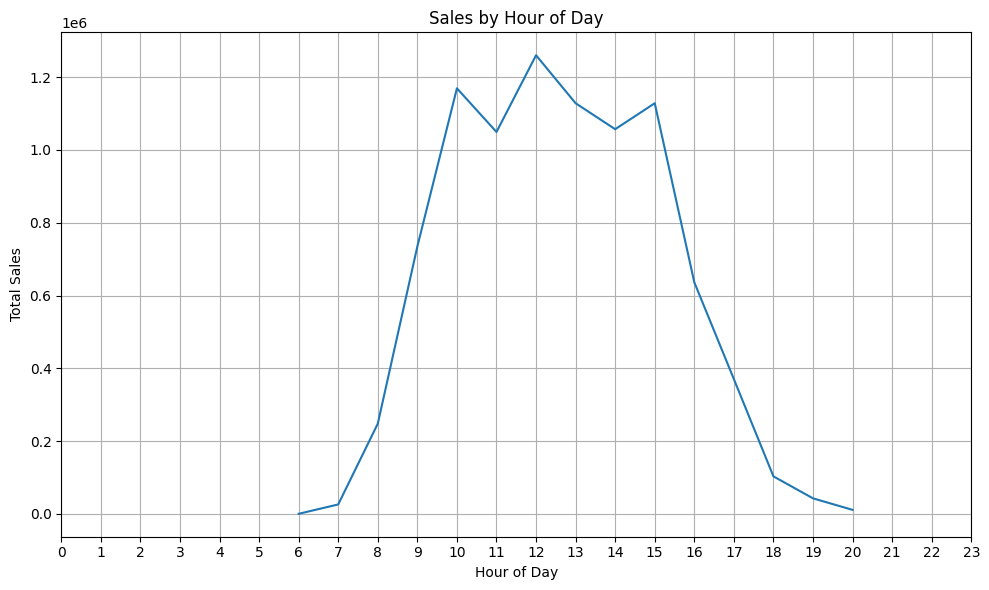

In [ ]:
sales_by_hour = df.groupby("Hour")["TotalPrice"].sum()
# Visualize sales by hour of the day
plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_by_hour.index, y=sales_by_hour.values)
plt.title("Sales by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()

- Sales activity starts around 6-7 AM, peaks around noon (12 PM), and then
 gradually declines.
- This indicates that most transactions occur during typical business
 hours.

**6.2 Regional Sales Performance**
-  We will analyze sales by country to identify top-performing regions.

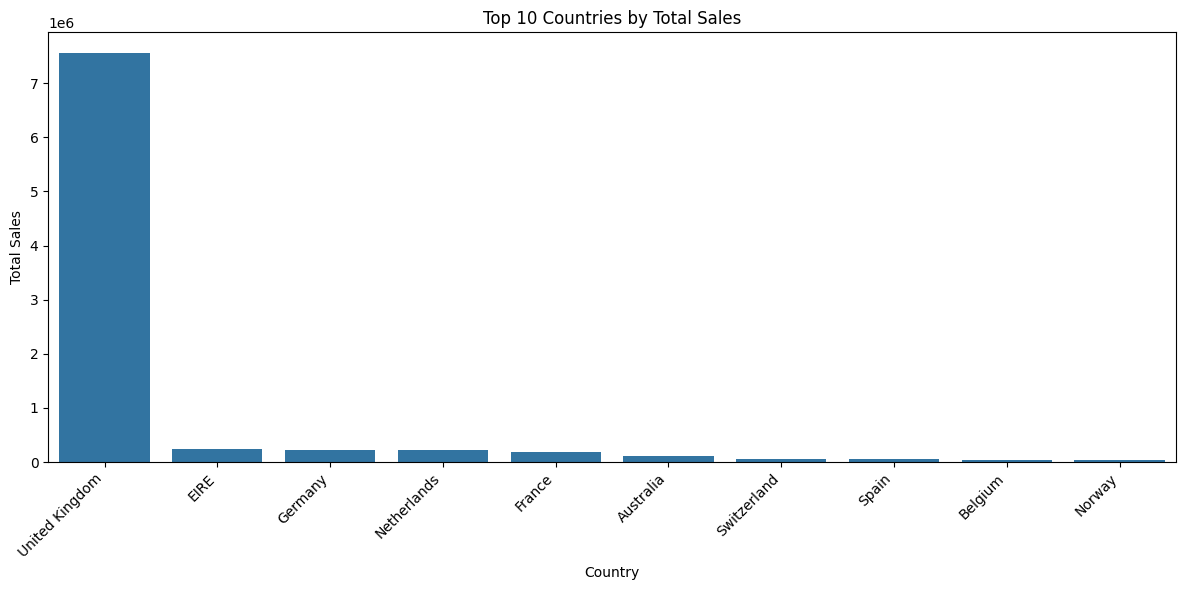

In [ ]:
sales_by_country = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)
 # Visualize top 10 countries by total sales
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_country.index, y=sales_by_country.values)
plt.title("Top 10 Countries by Total Sales")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

- The United Kingdom is the dominant market, contributing the vast
 majority of total sales. EIRE, Netherlands, Germany, and France are the next largest markets, but their sales are significantly lower than the UK.


**6.3 Market Basket Analysis**

- Market Basket Analysis helps us discover associations between products. We will use the Apriori algorithm to find frequently purchased itemsets and generate association rules.

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
 # Prepare the data for Market Basket Analysis (focus on UK)
basket = (df[df["Country"] == "United Kingdom"].groupby(["InvoiceNo", "Description"])
 ["Quantity"].sum().unstack().reset_index().fillna(0).set_index("InvoiceNo"))
 # Convert quantities to 0 or 1 (item present or not)
def encode_units(x):

  if x <= 0:
    return 0
  if x >= 1:
   return 1
basket_sets = basket.applymap(encode_units)
 # Run Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.03,
 use_colnames=True)
 # Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
 # Display the top association rules
print(" Top Association Rules:\n")
print(rules.head())

<ipython-input-58-698028073>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


 Top Association Rules:

                            antecedents                           consequents  \
0           (ALARM CLOCK BAKELIKE RED )          (ALARM CLOCK BAKELIKE GREEN)   
1          (ALARM CLOCK BAKELIKE GREEN)           (ALARM CLOCK BAKELIKE RED )   
2   (GARDENERS KNEELING PAD KEEP CALM )  (GARDENERS KNEELING PAD CUP OF TEA )   
3  (GARDENERS KNEELING PAD CUP OF TEA )   (GARDENERS KNEELING PAD KEEP CALM )   
4      (PINK REGENCY TEACUP AND SAUCER)     (GREEN REGENCY TEACUP AND SAUCER)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.051609            0.048613  0.031243    0.605376  12.453061   
1            0.048613            0.051609  0.031243    0.642694  12.453061   
2            0.049834            0.041620  0.030022    0.602450  14.474863   
3            0.041620            0.049834  0.030022    0.721333  14.474863   
4            0.038957            0.051720  0.031964    0.820513  15.864422   

   representativity

- The association rules reveal which products are frequently bought together , These insights are valuable for
 cross-selling, product placement, and promotional strategies.


**6.4 Product Performance**
- We will analyze product performance by identifying the top-selling products in terms of
 both quantity and total sales.

 **Top 10 Products by Quantity Sold**

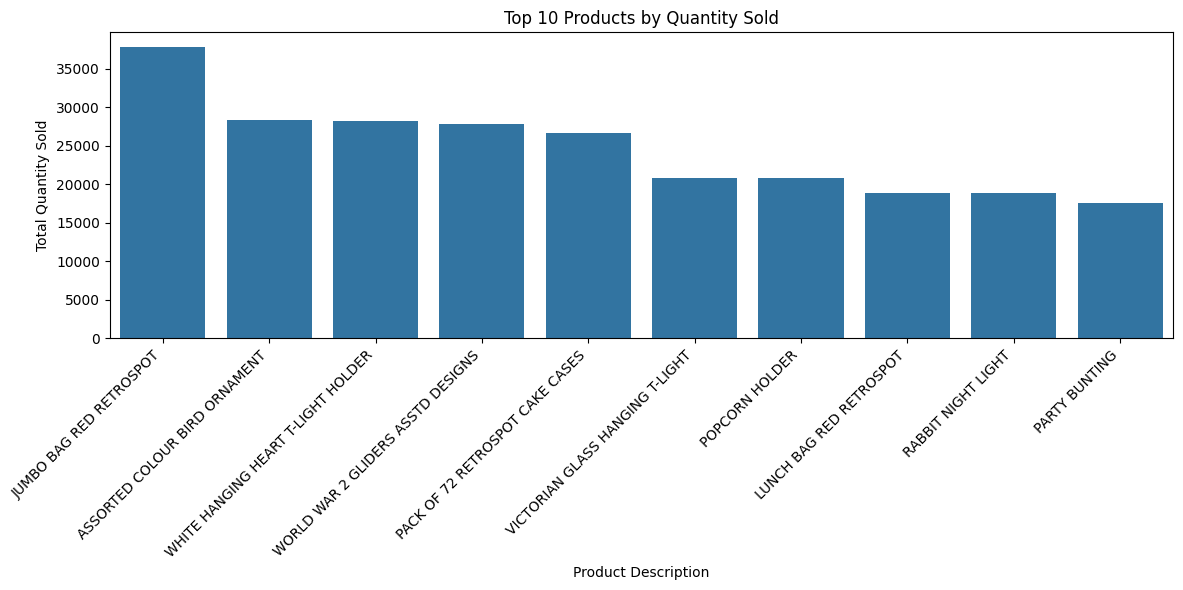

In [ ]:
top_products_quantity = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
# Visualize top 10 products by quantity sold
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_quantity.index,
y=top_products_quantity.values)
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Product Description")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

 - This chart shows the most popular products by the number of units sold.
 Products like JUMBO BAG RED RETROSPOT and ASSORTED COLOUR BIRD ORNAMENT
 are clear volume leaders.

**Top 10 Products by Total Sales**

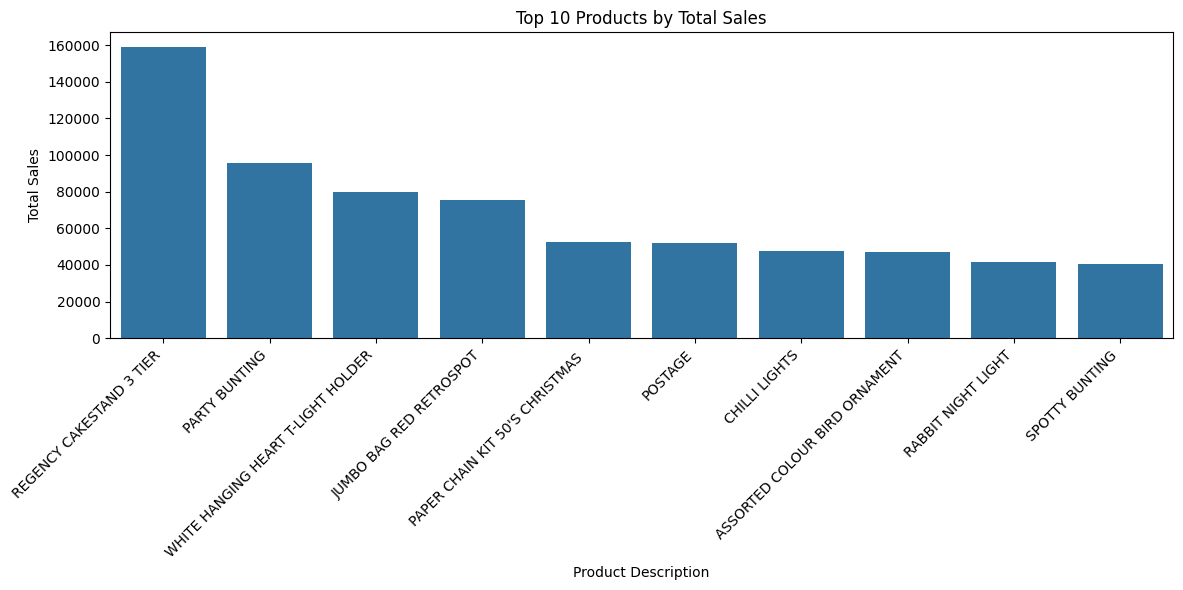

In [ ]:
 # Calculate top 10 products by total sales
top_products_sales = df.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products_sales.index,
y=top_products_sales.values)
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Product Description")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

- This chart highlights the products that generate the most revenue. While
 some products overlap with the top quantity list, REGENCY CAKESTAND 3 TIER stands out as the top revenue generator, indicating a higher price point or high demand.

**6.5 Customer Analytics**
- We will analyze customer behavior using the RFM features we engineered earlier.

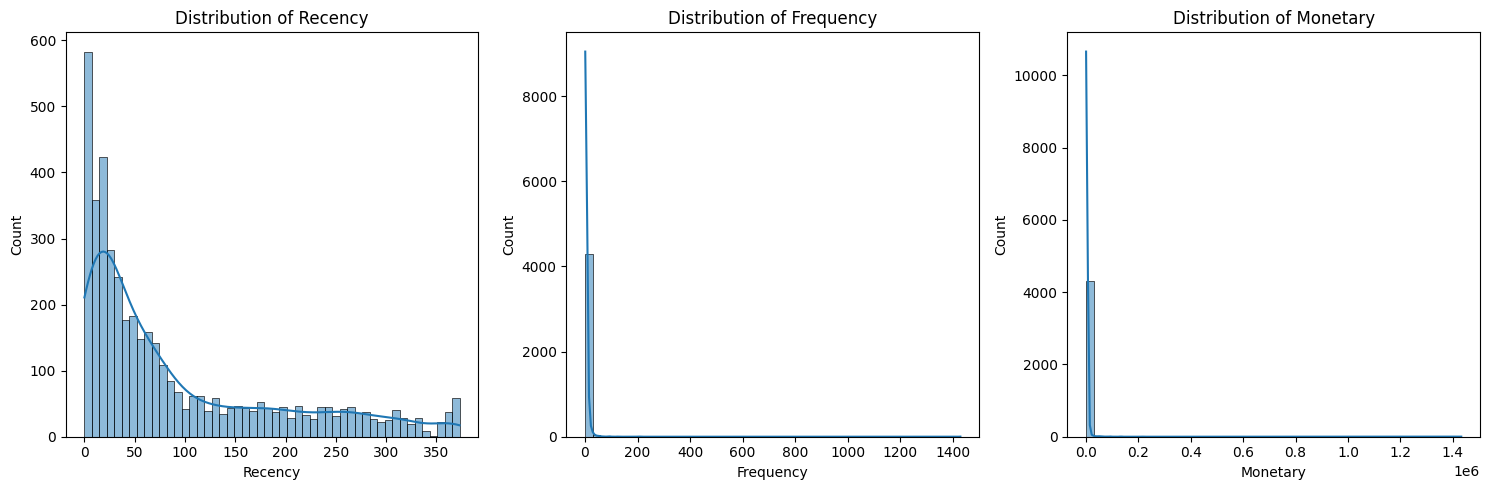

In [ ]:
rfm_df = pd.read_csv("RFM_data.csv")
 # Visualize the distributions of Recency, Frequency, and Monetary values
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm_df["Recency"], bins=50, kde=True)
plt.title("Distribution of Recency")
plt.subplot(1, 3, 2)
sns.histplot(rfm_df["Frequency"], bins=50, kde=True)
plt.title("Distribution of Frequency")
plt.subplot(1, 3, 3)
sns.histplot(rfm_df["Monetary"], bins=50, kde=True)
plt.title("Distribution of Monetary")
plt.tight_layout()

- The RFM distributions are all skewed to the right, which is typical for retail
 data. This means:

 - Recency: A large number of customers have made a purchase recently.
 - Frequency: Most customers have made only a few purchases.
 - Monetary: Most customers have spent relatively small amounts.
- These distributions highlight the importance of segmenting customers to identify high value and at-risk groups

# **7. Customer Segmentation Model**
-  Customer segmentation involves dividing customers into groups based on shared
 characteristics. We will use the RFM features and the K-Means clustering algorithm to segment our customers.

Generated elbow_method.png
Customer Segment Characteristics (Mean RFM Values):
         Recency  Frequency    Monetary
Cluster                                
0          30.96       5.48     2323.72
1         151.65       2.21      686.21
2           0.00    1429.00  1432405.93
3         293.43       1.35      387.42


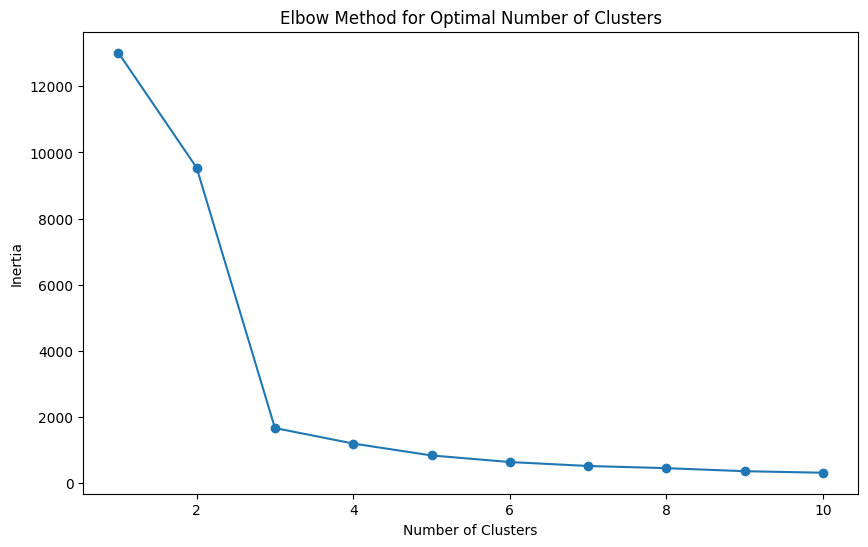

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

rfm_scaled = StandardScaler().fit_transform(rfm_df[["Recency","Frequency", "Monetary"]])
 # Determine the optimal number of clusters using the Elbow Method
inertia = []
for n_clusters in range(1, 11):

  kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init='auto')
  kmeans.fit(rfm_scaled)
  inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.savefig("elbow_method.png")
print("Generated elbow_method.png")
 # Apply K-Means clustering (based on elbow method, let\"s choose 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
rfm_df["Cluster"] = kmeans.fit_predict(rfm_scaled)
 # Analyze cluster characteristics
cluster_means = rfm_df.groupby("Cluster").agg({
    "Recency": "mean",
    "Frequency": "mean",
    "Monetary": "mean"
 }).round(2)
print("Customer Segment Characteristics (Mean RFM Values):")
print(cluster_means)

- Scaling : RFM features were scaled using StandardScaler to ensure that all
 features contribute equally to the clustering process, as K-Means is sensitive to feature scales.
-  The Elbow Method was used to determine
 the optimal number of clusters. The plot shows the inertia (sum of squared
 distances to the closest centroid) for different numbers of clusters. The "elbow" point, where the rate of decrease in inertia slows down, suggests an optimal number of clusters.
- In this case, 4 clusters appear to be a reasonable choice.

Text(0.5, 1.0, 'Customer Segments (Recency vs. Monetary)')

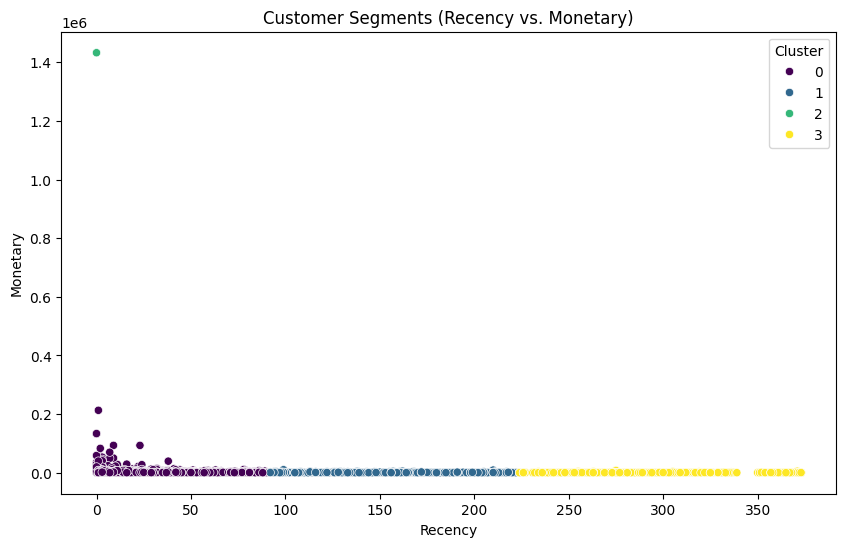

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Recency", y="Monetary", hue="Cluster",
data=rfm_df, palette="viridis")
plt.title("Customer Segments (Recency vs. Monetary)")

 By examining the mean RFM values for each cluster, we can interpret the segments:
- Cluster 3 (Best Customers/Champions): Very low recency, very high
 frequency, and very high monetary value. These are the most valuable
 customers.
- Cluster 2 (Loyal Customers): Low recency, high frequency, and high
 monetary value. Frequent and valuable, but not as recent or high-spending as
 champions.
- Cluster 0 (At-Risk Customers): Moderate recency, moderate frequency, and
 moderate monetary value. They might be slipping away and need re
engagement.
- Cluster 1 (Churned/Lost Customers): Very high recency, low frequency, and
 low monetary value. Likely lost and might require significant effort to
 reactivate.

- A scatter plot of Recency vs. Monetary, colored by cluster, helps visualize the distinct customer segments.
- This segmentation provides actionable insights for targeted marketing campaigns, customer retention strategies, and personalized offers

# **8. Product Recommendation Model**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
user_item_matrix = df.pivot_table(index="CustomerID", columns="Description", values="Quantity").fillna(0)
user_item_matrix = user_item_matrix.applymap(lambda x: 1 if x >0 else 0)
 # Save the user-item matrix
user_item_matrix.to_csv("user_item_matrix.csv")
print("User-item matrix saved to user_item_matrix.csv")
# Calculate item-item similarity using cosine similarity
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity,index=user_item_matrix.columns,
columns=user_item_matrix.columns)

def get_recommendations(customer_id, user_item_matrix,
 item_similarity_df, num_recommendations=5):
 # Get the items purchased by the customer
 customer_items = user_item_matrix.loc[customer_id]
 [user_item_matrix.loc[customer_id] > 0].index
 # Initialize a dictionary to store recommendation scores
 recommendation_scores = {}
 # For each item purchased by the customer
 for item in customer_items:

  similar_items =item_similarity_df[item].sort_values(ascending=False)
 # Iterate through similar items
 for similar_item, similarity_score in similar_items.items():

   if similar_item not in customer_items:
    if similar_item not in recommendation_scores:
      recommendation_scores[similar_item] = 0
      recommendation_scores[similar_item] +=similarity_score
 # Sort recommendations by score
 recommended_items = sorted(recommendation_scores.items(),
 key=lambda x: x[1], reverse=True)
 return [item for item, score in
 recommended_items[:num_recommendations]]
 # Example: Get recommendations for a sample customer
 sample_customer_id = user_item_matrix.index[0]
 # Using the first customer for demonstration
 recommendations = get_recommendations(sample_customer_id,
 user_item_matrix, item_similarity_df)
 print(f" Recommendations for Customer {sample_customer_id}:{recommendations}")

<ipython-input-67-3844606879>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  user_item_matrix = user_item_matrix.applymap(lambda x: 1 if x >0 else 0)


User-item matrix saved to user_item_matrix.csv


In [ ]:
df2=pd.read_csv("user_item_matrix.csv")
df2.head()

,CustomerID,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,-1.0,1,1,1,1,0,1,1,1,1,...,0,1,1,1,0,1,1,1,1,1
1,12346.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12347.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12348.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12349.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- User-Item Matrix: A matrix was created where rows represent customers, columns represent products, and the values indicate whether a customer purchased a product (1 if purchased, 0 otherwise).
- This matrix captures the purchase history.

- Item-Item Similarity: Cosine similarity was used to calculate the similarity between pairs of items.
- This is done by comparing the purchase patterns of items
 across all customers.
-  Items that are frequently bought by the same customers will
 have higher similarity scores.
-Recommendation Generation: The
get_recommendations function works as
 follows:
 It takes a customer_id , the user_item_matrix , and the
item_similarity_df as input.
- It identifies all items previously purchased by that customer.
- For each purchased item, it finds other items that are similar to it (based on the item similarity matrix).
- It aggregates the similarity scores for items that the customer has not yet purchased.
- Finally, it returns the top N recommended items with the highest aggregated similarity scores

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'Year', 'Month',
       'Day', 'DayOfWeek', 'Hour'],
      dtype='object')